# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob
import io
from PIL import Image
import matplotlib
import math
import IPython.display as display

%matplotlib inline  

feature_descriptions = {
    'image/height': tf.io.VarLenFeature(tf.int64),
    'image/width': tf.io.VarLenFeature(tf.int64),
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
    'image/object/bbox/xmin': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/xmax': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/ymin': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/ymax': tf.io.VarLenFeature(tf.float32),
    'image/object/class/text': tf.io.VarLenFeature(tf.string),
    'image/object/class/label': tf.io.VarLenFeature(tf.int64)
}

In [2]:
def _parse_image_fn(example):
    return tf.io.parse_single_example(example, feature_descriptions)

In [3]:
def give_image(image_dataset):
    for e in image_dataset:
        image = Image.open(io.BytesIO(e['image/encoded'].numpy()))
    return image

In [12]:
def give_bbox(e):
    xmins = e['image/object/bbox/xmin'].values.numpy()
    ymins = e['image/object/bbox/ymin'].values.numpy()
    xmaxs = e['image/object/bbox/xmax'].values.numpy()
    ymaxs = e['image/object/bbox/ymax'].values.numpy()
    height = e['image/height'].values.numpy()
    width = e['image/width'].values.numpy()

    for i, xmin in enumerate(xmins):
        xmins[i] = xmin * width

    for i, ymin in enumerate(ymins):
        ymins[i] = ymin * height

    for i, xmax in enumerate(xmaxs):
        xmaxs[i] = xmax * width

    for i, ymax in enumerate(ymaxs):
        ymaxs[i] = ymax * height
    return xmins, ymins, xmaxs, ymaxs

In [5]:
def give_label(e):
    labels = e['image/object/class/label'].values.numpy()
    return labels

In [6]:
def draw_bbox(ax, labels, xmins, ymins, xmaxs, ymaxs):
    #something
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}

    for i, label in enumerate(labels):
        xmin = xmins[i]
        ymin = ymins[i]
        xmax = xmaxs[i]
        ymax = ymaxs[i]

        rec = Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, facecolor='none', edgecolor=colormap[label])
        ax.add_patch(rec)

In [53]:
def show_images(image_dataset):
    f, ax = plt.subplots(5, 2, figsize=(20,36), tight_layout=True)
    x = 0
    y = 0

    for e in image_dataset:
        xmins, ymins, xmaxs, ymaxs = give_bbox(e)
        labels = give_label(e)
        img = Image.open(io.BytesIO(e['image/encoded'].numpy()))
        ax[x, y].imshow(img)
        draw_bbox(ax[x, y], labels, xmins, ymins, xmaxs, ymaxs)
        ax[x, y].axis('off')

        x = (x+1) % 5
        y = (y+1) % 2
    plt.show()

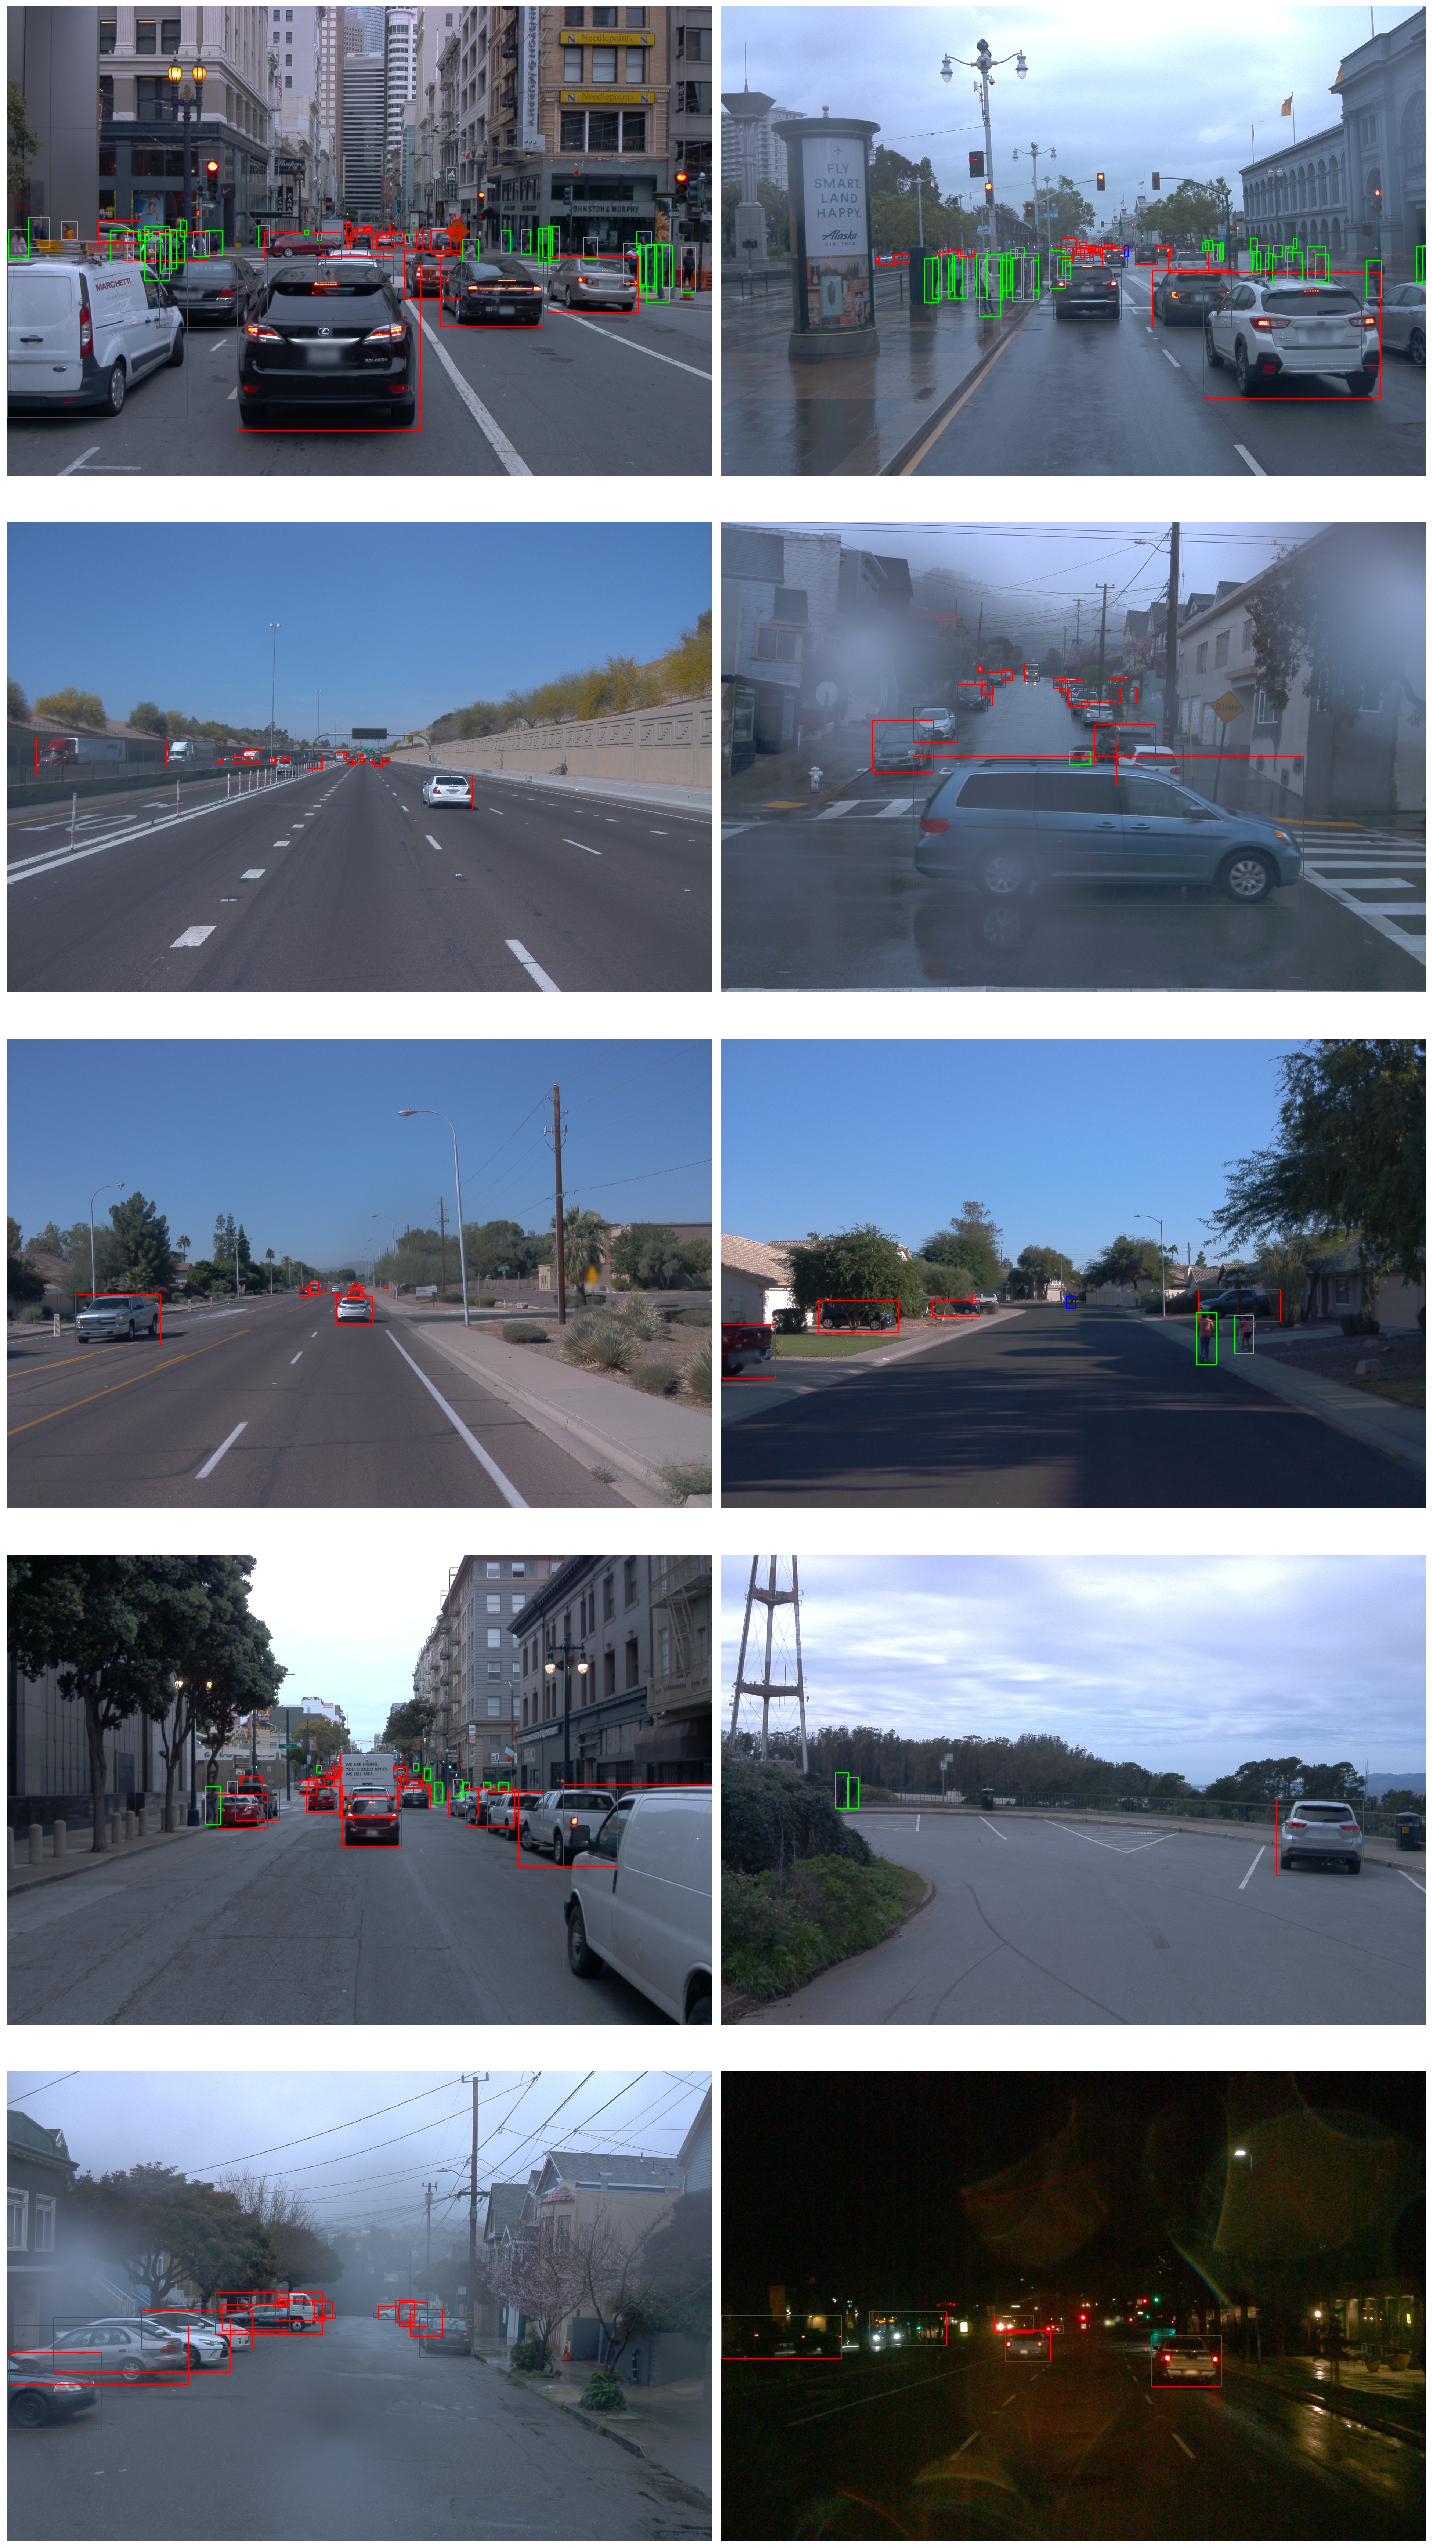

In [54]:
#dataset = get_dataset("/app/project/Object-Detection-in-an-Urban-Environment/workspace/data/train/*.tfrecord")
tfr_filepaths = glob("./data/train/*.tfrecord")
dataset = tf.data.TFRecordDataset(tfr_filepaths)

image_dataset = dataset.map(_parse_image_fn)

image_dataset = image_dataset.shuffle(sum(1 for _ in image_dataset))
image_dataset = image_dataset.take(10)

show_images(image_dataset)

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [30]:
def display_instances(image_dataset):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    f, ax = plt.subplots(2, 5, figsize=(20,20))
    x = 0
    y = 0

    for e in image_dataset:
        #xmins, ymins, xmaxs, ymaxs = give_bbox(e)
        #labels = give_label(e)
        img = Image.open(io.BytesIO(e['image/encoded'].numpy()))
        ax[x, y].imshow(img)
        #draw_bbox(ax[x, y], labels, xmins, ymins, xmaxs, ymaxs)
        ax[x, y].axis('off')

        #x = (x+1) % 2
        #y = (y+1) % 5
    plt.show()

In [31]:
display_instances(dataset)

KeyError: 'image/encoded'

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

In [ ]:
## STUDENT SOLUTION HERE

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...